# Welcome to My Python Notebook (2/2) Final Modeling

## Final Project Submission

Please fill out:
* Student name: Joe Sanchez
* Student pace: self paced 
* Scheduled project review date/time: February 18th, 2021 1:30pm PST
* Instructor name: Jeff Herman
* Blog post URL:

# Introduction:

Hello and welcome to my second python notebook. In this notebook I will be modeling the King County Housing dataframe that has been cleaned and processed. I will be using Stats Models OLS to predict the pricing of houses as accurately as possible. 

The purpose of these models will be to give actionable insight to real estate agents working for a Real Estate Firm. I will be predicting prices for homes and their features such as bathrooms, condition, and square footage.

Going forward I will be testing 3 Final Models using various parts of the dataframe and then comparing to see which Model proves most accurate.

# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib as mpl
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.stats.api as sms
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

/Users/Joe/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:

sns.set_style("whitegrid", {"axes.facecolor": ".9"})

In [3]:
# import final dataframe from previous notebook
df = pd.read_csv('final_model_df.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14208 entries, 0 to 14207
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 14208 non-null  float64
 1   sqft_living           14208 non-null  float64
 2   lat                   14208 non-null  float64
 3   long                  14208 non-null  float64
 4   renovated_binary      14208 non-null  int64  
 5   view_binary           14208 non-null  int64  
 6   bdrms_2.0             14208 non-null  int64  
 7   bdrms_3.0             14208 non-null  int64  
 8   bdrms_4.0             14208 non-null  int64  
 9   bdrms_5.0             14208 non-null  int64  
 10  bdrms_6.0             14208 non-null  int64  
 11  floor_2.0             14208 non-null  int64  
 12  floor_3.0             14208 non-null  int64  
 13  waterfront_1.0        14208 non-null  int64  
 14  condition_2.0         14208 non-null  int64  
 15  condition_3.0      

# MODEL 1

For the first model, I will be using the full dataframe to train and test. 
I will then validate the results to make sure the residuals are equal across a regression line.

In [5]:
# Create a train_test_split with a test size of 25% 
X = df.drop(['price'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [6]:
# view test and train sizes
print(len(X_train), len(X_test), len(y_train), len(y_test))

10656 3552 10656 3552


In [7]:
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

In [8]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression()

In [9]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [10]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [11]:
# View the Train and Test Mean Squared Error
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

print(np.sqrt(train_mse))

Train Mean Squarred Error: 11807096185.819872
Test Mean Squarred Error: 11346594972.934067
108660.46284559932


In [12]:
predictors = X_train
predictors_int = sm.add_constant(predictors)
model = sm.OLS(y_train,predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     657.7
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        13:05:27   Log-Likelihood:            -1.3869e+05
No. Observations:               10656   AIC:                         2.774e+05
Df Residuals:                   10625   BIC:                         2.777e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -3.467e+07   1.18e+06    -29.374      0.000    -3.7e+07   -3.24e+07
sqft_living            100.6230      3.044     33.058      0.000      94.656     106.590
lat                   6.092e+05   8050.155     75.677      0.000    5.93e+05    6.25e+05
long                 -4.711e+04   9486.585     -4.966      0.000   -6.57e+04   -2.85e+04
renovated_binary      6.788e+04   6398.506     10.609      0.000    5.53e+04    8.04e+04
view_binary           8.849e+04   4874.004     18.155      0.000    7.89e+04     9.8e+04
bdrms_2.0             -707.0489   1.04e+04     -0.068      0.946   -2.11e+04    1.97e+04
bdrms_3.0            -1.551e+04   1.05e+04     -1.480      0.139    -3.6e+04    5033.595
bdrms_4.0             -2.16e+04   1.08e+04     -1.996      0.046   -4.28e+04    -386.161
bdrms_5.0            -2.862e+04   1.19e+04     -2.410      0.016   -5.19e+04   -5340.126
bdrms_6.0            -1.673e+04   1.65e+04     -1.016      0.310    -4.9e+04    1.56e+04
floor_2.0             3.079e+04   2695.666     11.421      0.000    2.55e+04    3.61e+04
floor_3.0             8818.7403   6240.021      1.413      0.158   -3412.869    2.11e+04
waterfront_1.0        2.426e+05   6.32e+04      3.840      0.000    1.19e+05    3.66e+05
condition_2.0        -2.622e+04    3.4e+04     -0.771      0.441   -9.29e+04    4.05e+04
condition_3.0        -1.048e+04   3.18e+04     -0.329      0.742   -7.28e+04    5.19e+04
condition_4.0         3.085e+04   3.18e+04      0.969      0.333   -3.16e+04    9.33e+04
condition_5.0         6.656e+04    3.2e+04      2.081      0.037    3855.043    1.29e+05
bathrooms_1.0         9.451e+04   5.46e+04      1.732      0.083   -1.24e+04    2.01e+05
bathrooms_2.0         7.554e+04   5.46e+04      1.384      0.166   -3.15e+04    1.83e+05
bathrooms_3.0         8.559e+04   5.47e+04      1.564      0.118   -2.17e+04    1.93e+05
bathrooms_4.0         8.629e+04    5.5e+04      1.568      0.117   -2.16e+04    1.94e+05
bathrooms_5.0         1.162e+05   8.37e+04      1.387      0.165    -4.8e+04     2.8e+05
grade_5.0              542.2202   3.49e+04      0.016      0.988   -6.78e+04    6.89e+04
grade_6.0             2.407e+04   3.37e+04      0.715      0.475    -4.2e+04    9.01e+04
grade_7.0             7.496e+04   3.37e+04      2.222      0.026    8841.209    1.41e+05
grade_8.0             1.389e+05   3.39e+04      4.103      0.000    7.26e+04    2.05e+05
grade_9.0             2.316e+05   3.41e+04      6.785      0.000    1.65e+05    2.99e+05
grade_10.0            2.947e+05   3.51e+04      8.405      0.000    2.26e+05    3.63e+05
grade_11.0            4.008e+05   5.36e+04      7.484      0.000    2.96e+05    5.06e+05
sqft_basement_binary  2.245e+04   2611.722      8.595      0.000    1.73e+04    2.76e+04
=========================================================

The test error is lower than the train error which is good so far!

Next I'm going to check for Heteroscedasticity 

(array([1.100e+01, 4.800e+01, 1.850e+02, 6.380e+02, 2.433e+03, 4.662e+03,
        2.310e+03, 3.430e+02, 2.300e+01, 3.000e+00]),
 array([-586230.59655499, -476872.14803682, -367513.69951864,
        -258155.25100046, -148796.80248229,  -39438.35396411,
          69920.09455407,  179278.54307225,  288636.99159042,
         397995.4401086 ,  507353.88862678]),
 <a list of 10 Patch objects>)

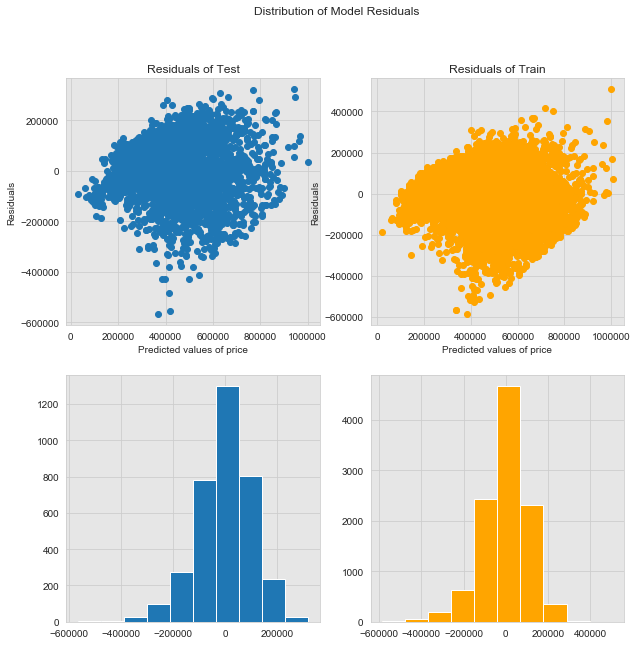

In [13]:
fig = plt.figure(figsize=(10,10))
fig.suptitle("Distribution of Model Residuals")

ax1 = fig.add_subplot(2,2,1) #Scatterplot of test residuals
ax1.scatter(x=y_hat_test, y=test_residuals)
ax1.set_title('Residuals of Test')
ax1.set_xlabel('Predicted values of price')
ax1.set_ylabel('Residuals')

ax2 = fig.add_subplot(2,2,2) #Scatterplot of train residuals
ax2.scatter(x=y_hat_train, y=train_residuals, c='orange')
ax2.set_title('Residuals of Train')
ax2.set_xlabel('Predicted values of price')
ax2.set_ylabel('Residuals')

ax3 = fig.add_subplot(2,2,3) #Histogram of test residuals
ax3.hist(test_residuals) 

ax4 = fig.add_subplot(2,2,4) #Histogram of train residuals
ax4.hist(train_residuals, color='orange')

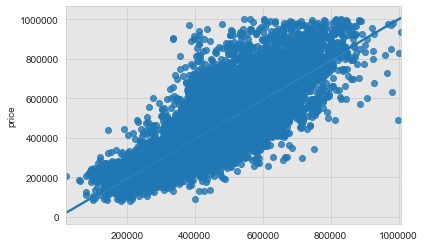

In [14]:
sns.regplot(model.fittedvalues,y_train)

Heteroscedasticity checks out!

Now I'm going to take a look at the coefficients to see how much each predictor costs!

In [15]:
model_coefficients = pd.DataFrame(model.params[1:], columns=['coefficients'])

In [16]:
model_coefficients.sort_values(by='coefficients', ascending=False)


,coefficients
lat,609211.236624
grade_11.0,400817.577842
grade_10.0,294695.377540
waterfront_1.0,242551.460996
grade_9.0,231598.709888
grade_8.0,138933.888158
bathrooms_5.0,116185.093009
bathrooms_1.0,94509.004647
view_binary,88487.172821
bathrooms_4.0,86288.728650


After the first model, I'm satisfied with the results so far. However, there are a few predictors with p-values higher than 0.05 which is no good. The R^2 is fair, and the validations check out for Heteroscedasticity.

# MODEL 2

For the next Model I'm going to run an OLS Model on the top 10 predictors that are highly correlated to price!

First I'm going to view the correlation bar graph that I created and ran in the previous notebook!

In [17]:
x = df.drop(columns=['price'], axis=1)
y = df['price']

correlation_to_price = []
for col in x.columns:
    correlation_to_price.append(round(stats.pearsonr(x[col],y)[0],2))

correlation_dict={}
for i, c in zip(x.columns,correlation_to_price):
    correlation_dict[i] = c

df_correlation = pd.DataFrame(sorted(correlation_dict.items(),key=lambda x:x[1],reverse=True),columns=['predictors','correlation'])


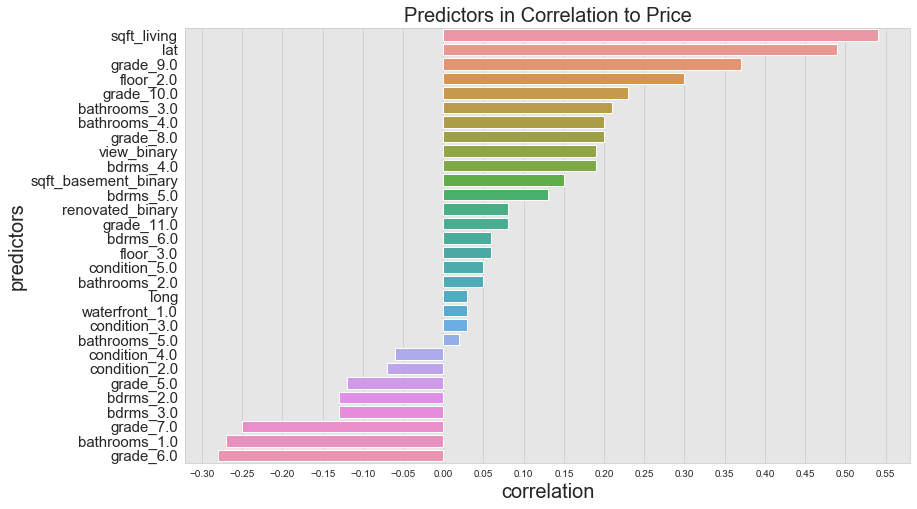

In [18]:
fig, ax = plt.subplots(figsize=(13,8))

plt.xticks(np.arange(-1,1,.05))
plt.yticks(size=15)

plt.title("Predictors in Correlation to Price", size=20)
plt.xlabel("Correlation", size=20)
plt.ylabel("Predictors", size =20)


sns.set_theme(font_scale=1)
sns.barplot(df_correlation['correlation'],df_correlation['predictors'])

Next I'm going to pick the top 10 highest correlated predictors to price and assign them to dataframe variable

In [19]:
df2 = df[['price', 'grade_9.0','grade_10.0', 'sqft_living', 'lat', 'bathrooms_3.0', 'bathrooms_4.0', 'floor_2.0', 'grade_8.0', 'bdrms_4.0', 'view_binary']]



In [20]:
df2.head()

,price,grade_9.0,grade_10.0,sqft_living,lat,bathrooms_3.0,bathrooms_4.0,floor_2.0,grade_8.0,bdrms_4.0,view_binary
0,221900.0,0,0,1180.0,47.5112,0,0,0,0,0,0
1,538000.0,0,0,2570.0,47.7210,0,0,1,0,0,0
2,180000.0,0,0,770.0,47.7379,0,0,0,0,0,0
3,604000.0,0,0,1960.0,47.5208,1,0,0,0,1,0
4,510000.0,0,0,1680.0,47.6168,0,0,0,1,0,0


Now to run the OLS Model on the top 10 correlated predictors

In [21]:
predictors2 = df2.drop(['price'], axis =1)

In [22]:
predictors_int = sm.add_constant(predictors2)
model2 = sm.OLS(df['price'],predictors_int).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     2308.
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        13:05:31   Log-Likelihood:            -1.8552e+05
No. Observations:               14208   AIC:                         3.711e+05
Df Residuals:                   14197   BIC:                         3.711e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.072e+07   3.29e+05    -93.287      0.000   -3.14e+07   -3.01e+07
grade_9.0      1.329e+05   4074.209     32.618      0.000    1.25e+05    1.41e+05
grade_10.0     1.938e+05   8112.255     23.894      0.000    1.78e+05     2.1e+05
sqft_living     104.6198      2.222     47.086      0.000     100.265     108.975
lat            6.503e+05   6918.743     93.996      0.000    6.37e+05    6.64e+05
bathrooms_3.0  8790.1877   3601.027      2.441      0.015    1731.702    1.58e+04
bathrooms_4.0  9961.3925   6198.692      1.607      0.108   -2188.857    2.21e+04
floor_2.0      1.755e+04   2220.416      7.905      0.000    1.32e+04    2.19e+04
grade_8.0      5.609e+04   2400.776     23.363      0.000    5.14e+04    6.08e+04
bdrms_4.0     -3233.7343   2383.271     -1.357      0.175   -7905.257    1437.788
view_binary    1.046e+05   4357.062     24.006      0.000    9.61e+04    1.13e+05
==============================================================================
Omnibus:                     1245.027   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1979.745
Skew:                           0.662   Prob(JB):                         0.00
Kurtosis:                       4.262   Cond. No.                     6.60e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
X2 = df2.drop(['price'], axis=1)
y2 = df2['price']
X_train, X_test, y_train, y_test = train_test_split(X2,y2, test_size=0.25, random_state=42)

linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 12953139698.320284
Test Mean Squarred Error: 12575298331.782574


(array([2.000e+01, 9.300e+01, 3.530e+02, 1.007e+03, 3.227e+03, 4.286e+03,
        1.508e+03, 1.530e+02, 7.000e+00, 2.000e+00]),
 array([-553808.15295492, -443819.2886581 , -333830.42436128,
        -223841.56006447, -113852.69576765,   -3863.83147083,
         106125.03282599,  216113.89712281,  326102.76141962,
         436091.62571644,  546080.49001326]),
 <a list of 10 Patch objects>)

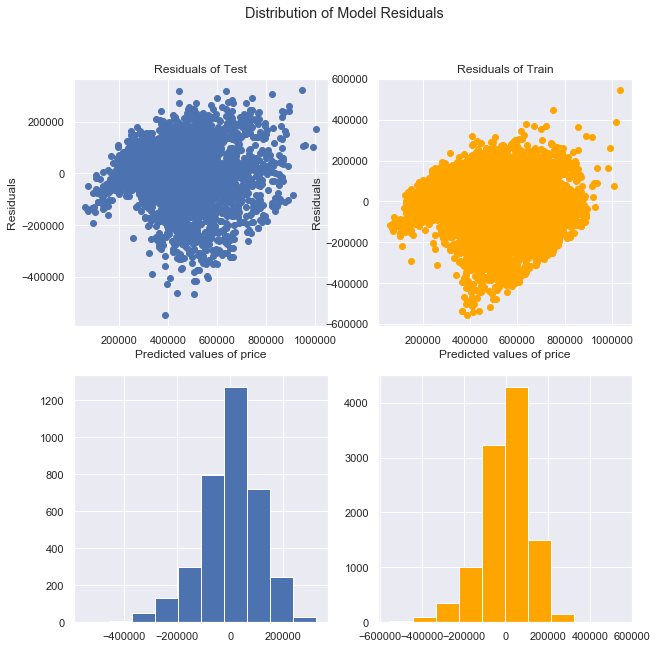

In [25]:
fig = plt.figure(figsize=(10,10))
fig.suptitle("Distribution of Model Residuals")

ax1 = fig.add_subplot(2,2,1) #Scatterplot of test residuals
ax1.scatter(x=y_hat_test, y=test_residuals)
ax1.set_title('Residuals of Test')
ax1.set_xlabel('Predicted values of price')
ax1.set_ylabel('Residuals')

ax2 = fig.add_subplot(2,2,2) #Scatterplot of train residuals
ax2.scatter(x=y_hat_train, y=train_residuals, c='orange')
ax2.set_title('Residuals of Train')
ax2.set_xlabel('Predicted values of price')
ax2.set_ylabel('Residuals')

ax3 = fig.add_subplot(2,2,3) #Histogram of test residuals
ax3.hist(test_residuals) 

ax4 = fig.add_subplot(2,2,4) #Histogram of train residuals
ax4.hist(train_residuals, color='orange')

After reviewing the model and checking for Heteroscedasticity, the results were fair. Although each predictor obtains a p-value less than 0.05, the R^2 Value was worse than our 1st Model. Which is not exactly what we're looking for.

# MODEL 3 FINAL

For my last and final model, I will be using stepwise selection to create a list of predictors to use that have a p-value less than .05! By doing so, I should have a model with a high number of predictors that show statistical significance.

In [26]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ 
    Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = included[pvalues.argmax()]
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


In [27]:
result = stepwise_selection(predictors, df['price'], verbose=True)
print('resulting features:')
print(result)

ValueError: The indices for endog and exog are not aligned

Perfect! Now I am going to apply this to the same OLS Model i've been using

In [ ]:
predictors4 = X[result]
X_with_intercept = sm.add_constant(predictors4)
model4 = sm.OLS(y,X_with_intercept).fit()
model4.summary()

In [ ]:
df5 = pd.read_csv('prepro_df.csv')

In [ ]:
y = df5['price']

In [ ]:
predictors5 = df5.drop(['price'], axis=1)
X_with_intercept = sm.add_constant(predictors5)
model4 = sm.OLS(y,X_with_intercept).fit()
model4.summary()

In [ ]:
X3 = X[result]
y3 = df['price']
X_train, X_test, y_train, y_test = train_test_split(X3,y3, test_size=0.25, random_state=42)

linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.suptitle("Distribution of Model Residuals")

ax1 = fig.add_subplot(2,2,1) #Scatterplot of test residuals
ax1.scatter(x=y_hat_test, y=test_residuals)
ax1.set_title('Residuals of Test')
ax1.set_xlabel('Predicted values of price')
ax1.set_ylabel('Residuals')

ax2 = fig.add_subplot(2,2,2) #Scatterplot of train residuals
ax2.scatter(x=y_hat_train, y=train_residuals, c='orange')
ax2.set_title('Residuals of Train')
ax2.set_xlabel('Predicted values of price')
ax2.set_ylabel('Residuals')

ax3 = fig.add_subplot(2,2,3) #Histogram of test residuals
ax3.hist(test_residuals) 

ax4 = fig.add_subplot(2,2,4) #Histogram of train residuals
ax4.hist(train_residuals, color='orange')

After review and checking for heteroscedasticity and test-train mean squared error, the results display the most accurate findings!

In [ ]:
model4_coefficients = pd.DataFrame(model4.params[1:], columns=['coefficients'])

In [ ]:
model4_coefficients.sort_values(by='coefficients', ascending=False)


# Model Summary

Multiple Linear Regression was used to predict the sale prices of the Kings County Data Set, as accurately as possible. 3 Models were trained and tested on a cleaned and normalized version of the data set, in which all 3 models performed well according to validating assumptions such as homoscedasticity and Test/Train mean squared error. However, the 3rd Model proved most effective as each predictor variable represented a statistically significant p-value of less than 0.05. Which then resulted in the predictor variables explaining 65% of the variance.

# Question 1: How does the number of bathrooms impact housing price?

In [ ]:
x = df[['bathrooms_1.0', 'bathrooms_2.0', 'bathrooms_3.0', 'bathrooms_4.0', 'bathrooms_5.0']]
y = df['price']

correlation_to_price = []
for col in x.columns:
    correlation_to_price.append(round(stats.pearsonr(x[col],y)[0],2))

correlation_dict={}
for i, c in zip(x.columns,correlation_to_price):
    correlation_dict[i] = c

df_correlation = pd.DataFrame(sorted(correlation_dict.items(),key=lambda x:x[1],reverse=True),columns=['predictors','correlation'])


In [ ]:
# To answer this question I'll use a correlation vizualization like I've done previously
# as well as add the prices for each predictor
fig, ax = plt.subplots(figsize=(13,8))

plt.xticks(np.arange(-1,1,.05))
plt.yticks(size=15)

plt.text(x=-0.11, y=0, s='$83,100', c='black', fontsize=25, verticalalignment='center', bbox=dict(fc='white',ec='black', alpha=0.6))
plt.text(x=-0.11, y=1, s='$82,689', c='black', fontsize=25, verticalalignment='center', bbox=dict(fc='white',ec='black', alpha=0.6))
plt.text(x=-0.11, y=2, s='$77,303', c='black', fontsize=25, verticalalignment='center', bbox=dict(fc='white',ec='black', alpha=0.6))
plt.text(x=-0.11, y=3, s='$122,892', c='black', fontsize=25, verticalalignment='center', bbox=dict(fc='white',ec='black', alpha=0.6))
plt.text(x=-0.11, y=4, s='$93,570', c='black', fontsize=25, verticalalignment='center', bbox=dict(fc='white',ec='black', alpha=0.6))

plt.title("Bathrooms in Correlation to Price", size=20)
plt.xlabel("Correlation", size=20)
plt.ylabel("Predictors", size =20)



sns.set_theme(font_scale=1)
sns.barplot(df_correlation['correlation'],df_correlation['predictors'])

This correlation bar graph displays how each number of bathrooms used in my final model correlates with the prices of homes under 1 million. Notice how homes with 1 or 5 bathrooms effects price the most! Hoever the low correlation to price makes this more interesting! This shows that these homes are more unique for middle class families.

In [ ]:
bathrooms5 = list(df['bathrooms_5.0'].value_counts())
bathrooms4 = list(df['bathrooms_4.0'].value_counts())
bathrooms3 = list(df['bathrooms_3.0'].value_counts())

bathrooms_order = list(df['bathrooms_2.0'].value_counts())
new_order = [1,0]
bathrooms2 = [bathrooms_order[i] for i in new_order]


bathrooms1 = list(df['bathrooms_1.0'].value_counts())

In [ ]:


category_names = ['No', 'Yes']
results = {
    '5 Bathrooms': bathrooms5,
    '4 Bathrooms': bathrooms4,
    '3 Bathrooms': bathrooms3,
    '2 Bathrooms': bathrooms2,
    '1 Bathroom' : bathrooms1
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(12, 7))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center', fontsize=20,
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='large')

    return fig, ax


survey(results, category_names)
plt.show()

This is another vizualization of the number of bathrooms that are in each of the 14208 units. Here we see that for 2 bathroom units, 9,395 homes have them and 4,814 do not. Of those remaining 4,814 units, the graph displays how many bathrooms each of those remaining units have.

# Question 2: What is the difference between Condition and Grade and how does it affect the house prices?

In [ ]:
x = df[['condition_5.0', 'condition_4.0', 'condition_3.0', 'condition_2.0']]
y = df['price']

correlation_to_price = []
for col in x.columns:
    correlation_to_price.append(round(stats.pearsonr(x[col],y)[0],2))

correlation_dict={}
for i, c in zip(x.columns,correlation_to_price):
    correlation_dict[i] = c

df_correlation = pd.DataFrame(sorted(correlation_dict.items(),key=lambda x:x[1],reverse=True),columns=['predictors','correlation'])


In [ ]:
fig, ax = plt.subplots(figsize=(13,8))

plt.xticks(np.arange(-1,1,.05))
plt.yticks(size=15)

plt.text(x=-0.02, y=0, s='$101,011', c='black', fontsize=25, verticalalignment='center', bbox=dict(fc='white',ec='black', alpha=0.6))
plt.text(x=-0.02, y=1, s='$21,693', c='black', fontsize=25, verticalalignment='center', bbox=dict(fc='white',ec='black', alpha=0.6))
plt.text(x=-0.02, y=2, s='$62,995', c='black', fontsize=25, verticalalignment='center', bbox=dict(fc='white',ec='black', alpha=0.6))
plt.text(x=-0.02, y=3, s='$13,721', c='black', fontsize=25, verticalalignment='center', bbox=dict(fc='white',ec='black', alpha=0.6))

plt.title("Condition in Correlation to Price", size=20)
plt.xlabel("Correlation", size=20)
plt.ylabel("Predictors", size =20)



sns.set_theme(font_scale=1)
sns.barplot(df_correlation['correlation'],df_correlation['predictors'])

This is a bar graph displaying not only the condition of the homes in correlation with the price but also how each condition score affects price. For example if a home has an overall condition score of 3, then we can expect a $21,000 increase on price.

In [ ]:
cond_5 = list(df['condition_5.0'].value_counts())
cond_4 = list(df['condition_4.0'].value_counts())

cond3_order = list(df['condition_3.0'].value_counts())
new_order = [1,0]
cond_3 = [cond3_order[i] for i in new_order]

cond_2 = list(df['condition_2.0'].value_counts())

In [ ]:


category_names = ['No', 'Yes']
results = {
    'Condition 5': cond_5,
    'Condition 4': cond_4,
    'Condition 3': cond_3,
    'Condition 2': cond_2
}

   
survey(results, category_names)
plt.show()

This graph displays each individual condition score and how many units that have been given that score. For example, condition 4 has been given to 3,326 units out of 14208.

In [ ]:
x = df[['grade_11.0', 'grade_10.0', 'grade_9.0', 'grade_8.0', 'grade_7.0', 'grade_6.0', 'grade_5.0']]
y = df['price']

correlation_to_price = []
for col in x.columns:
    correlation_to_price.append(round(stats.pearsonr(x[col],y)[0],2))

correlation_dict={}
for i, c in zip(x.columns,correlation_to_price):
    correlation_dict[i] = c

df_correlation = pd.DataFrame(sorted(correlation_dict.items(),key=lambda x:x[1],reverse=True),columns=['predictors','correlation'])


In [ ]:
fig, ax = plt.subplots(figsize=(13,8))

plt.xticks(np.arange(-1,1,.05))
plt.yticks(size=15)

plt.text(x=-0.11, y=0, s='$228,690', c='black', fontsize=25, verticalalignment='center', bbox=dict(fc='white',ec='black', alpha=0.6))
plt.text(x=-0.11, y=1, s='$296,694', c='black', fontsize=25, verticalalignment='center', bbox=dict(fc='white',ec='black', alpha=0.6))
plt.text(x=-0.11, y=2, s='$136,476', c='black', fontsize=25, verticalalignment='center', bbox=dict(fc='white',ec='black', alpha=0.6))
plt.text(x=-0.11, y=3, s='$418,291', c='black', fontsize=25, verticalalignment='center', bbox=dict(fc='white',ec='black', alpha=0.6))
plt.text(x=-0.11, y=4, s='$2,650', c='black', fontsize=25, verticalalignment='center', bbox=dict(fc='white',ec='black', alpha=0.6))
plt.text(x=-0.11, y=5, s='$72,523', c='black', fontsize=25, verticalalignment='center', bbox=dict(fc='white',ec='black', alpha=0.6))
plt.text(x=-0.11, y=6, s='$23,608', c='black', fontsize=25, verticalalignment='center', bbox=dict(fc='white',ec='black', alpha=0.6))
plt.title("Grade in Correlation to Price", size=20)
plt.xlabel("Correlation", size=20)
plt.ylabel("Predictors", size =20)



sns.set_theme(font_scale=1)
sns.barplot(df_correlation['correlation'],df_correlation['predictors'])

Now with grade, there are more higher correlated predictors. And the prices are so high! The grade of a house really adds value to the home.

In [ ]:
grade_11 = list(df['grade_11.0'].value_counts())
grade_10 = list(df['grade_10.0'].value_counts())
grade_9 = list(df['grade_9.0'].value_counts())
grade_8 = list(df['grade_8.0'].value_counts())
grade_7 = list(df['grade_7.0'].value_counts())
grade_6 = list(df['grade_6.0'].value_counts())
grade_5 = list(df['grade_5.0'].value_counts())


category_names = ['No', 'Yes']
results = {
    'Grade 11': grade_11,
    'Grade 10': grade_10,
    'Grade 9': grade_9,
    'Grade 8': grade_8,
    'Grade 7': grade_7,
    'Grade 6': grade_6,
    'Grade 5': grade_5
}

   
survey(results, category_names)
plt.show()

Here we see that grade 7 is the most common grade score out of the 14,209 units. With grade having the potential to add $72,523 to the price of the home.

# What are the most significant features real estate agents need to know about?

In [ ]:
x = df[['sqft_living', 'renovated_binary', 'floor_2.0', 'waterfront_1.0', 'sqft_basement_binary']]
y = df['price']

correlation_to_price = []
for col in x.columns:
    correlation_to_price.append(round(stats.pearsonr(x[col],y)[0],2))

correlation_dict={}
for i, c in zip(x.columns,correlation_to_price):
    correlation_dict[i] = c

df_correlation = pd.DataFrame(sorted(correlation_dict.items(),key=lambda x:x[1],reverse=True),columns=['predictors','correlation'])


In [ ]:
fig, ax = plt.subplots(figsize=(13,8))

plt.xticks(np.arange(-1,1,.05))
plt.yticks(size=15)

plt.title("Predictors in Correlation to Price", size=20)
plt.xlabel("Correlation", size=20)
plt.ylabel("Predictors", size =20)
plt.text(x=0.26, y=0, s='$97', c='black', fontsize=25, verticalalignment='center', bbox=dict(fc='white',ec='black', alpha=0.6))
plt.text(x=0.26, y=1, s='$29,344', c='black', fontsize=25, verticalalignment='center', bbox=dict(fc='white',ec='black', alpha=0.6))
plt.text(x=0.26, y=2, s='$22,340', c='black', fontsize=25, verticalalignment='center', bbox=dict(fc='white',ec='black', alpha=0.6))
plt.text(x=0.26, y=3, s='$71,645', c='black', fontsize=25, verticalalignment='center', bbox=dict(fc='white',ec='black', alpha=0.6))
plt.text(x=0.26, y=4, s='$270,038', c='black', fontsize=25, verticalalignment='center', bbox=dict(fc='white',ec='black', alpha=0.6))

sns.set_theme(font_scale=1, palette='mako_r')
sns.barplot(df_correlation['correlation'],df_correlation['predictors'])

These are some other predictor variables and how they affect price!

# Conclusion/Recommendations

After running 3 different models, the 3rd model proved to be most significant as each predictor obtained a p-value less than .05. My overall goal was to include as many predictor coefficients as possible while at the same time, including those that showed statistical significance. Unfortunately, after my 3rd and final model, I was left with not much to work with when it came to answering questions relevant to my case. In this case providing as much significant information, such as pricing and predictor correlations to price, for real estate agents. There are some recommendations I have for future work.


1. Lat and Long we're not used for questioning. I'd be very interested to see how lat and long combined would not only affect price but affect the other predictors as well. Although lat and long was included, I couldn't make much sense of the results as individuals.

2. Dummy variables were used to dive deeper into the categorical columns. My goal was to seek out the categories individually to see how they affect price. The categorical values followed a linear path, therefore would've been fine left alone and not converted into dummy variables. For future reference, leaving the categoricals as is, may prove for more statistical significance.

3. Choosing a test size was based off a basic rule of thumb, using 25% as a test size. Sampling different test sizes may prove for higher statistical significance. Unfortunately, I did not get to sample test sizes and therefore continued using 25% without knowing the affect of other test sizes.

# Thank you so much for taking the time to review these notebooks!